In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import recall_score, precision_score
from catboost import CatBoostClassifier

%matplotlib inline

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/ya_profi_contest/my_data_train_val.csv")

In [ ]:
{
"0": "unlabeled",
"10": "vehicle",
"40": "road",
"44": "parking",
"48": "sidewalk",
"50": "building",
"51": "fence",
"70": "vegetation",
"71": "trunk",
"72": "terrain",
"80": "pole"
}

{'0': 'unlabeled',
 '10': 'vehicle',
 '40': 'road',
 '44': 'parking',
 '48': 'sidewalk',
 '50': 'building',
 '51': 'fence',
 '70': 'vegetation',
 '71': 'trunk',
 '72': 'terrain',
 '80': 'pole'}

In [ ]:
df_train.shape

(5586011, 5)

In [ ]:
df_train = df_train[~np.isnan(df_train).any(axis=1)]

In [ ]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5586011 entries, 0 to 5586010
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   x          5586011 non-null  float64
 1   y          5586011 non-null  float64
 2   z          5586011 non-null  float64
 3   intensity  5586011 non-null  float64
 4   class      5586011 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 255.7 MB


Text(0.5, 1.0, 'Распределение класса точки')

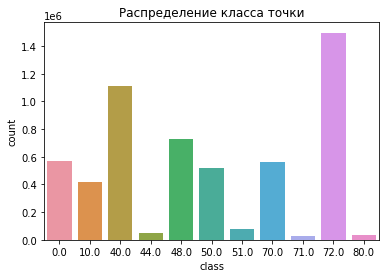

In [ ]:
sns.countplot(x = "class" , data  = df_train).set_title('Распределение класса точки')

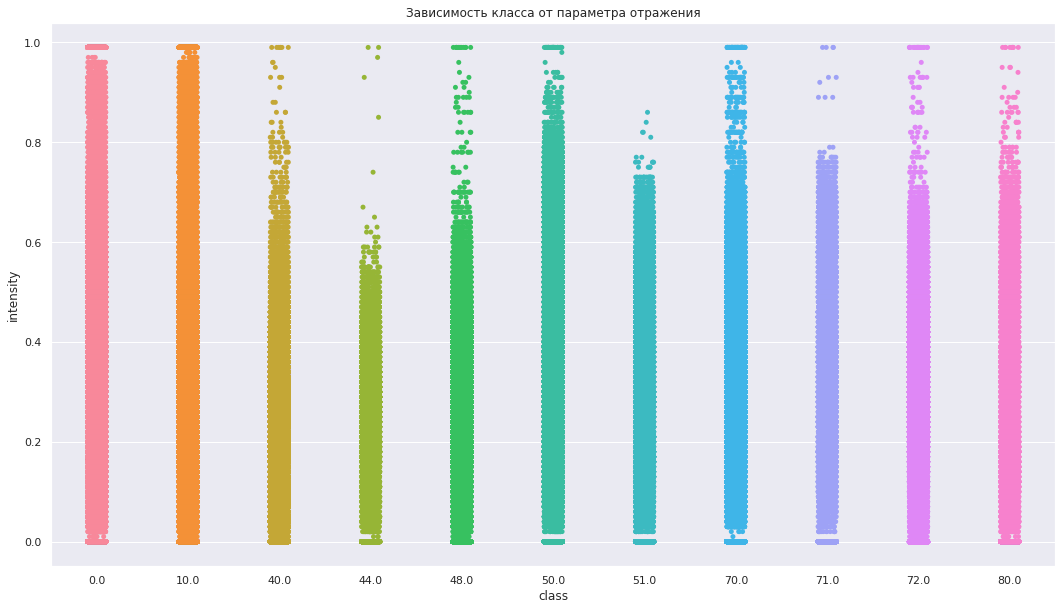

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "class", y = "intensity").set_title('Зависимость класса от параметра отражения');

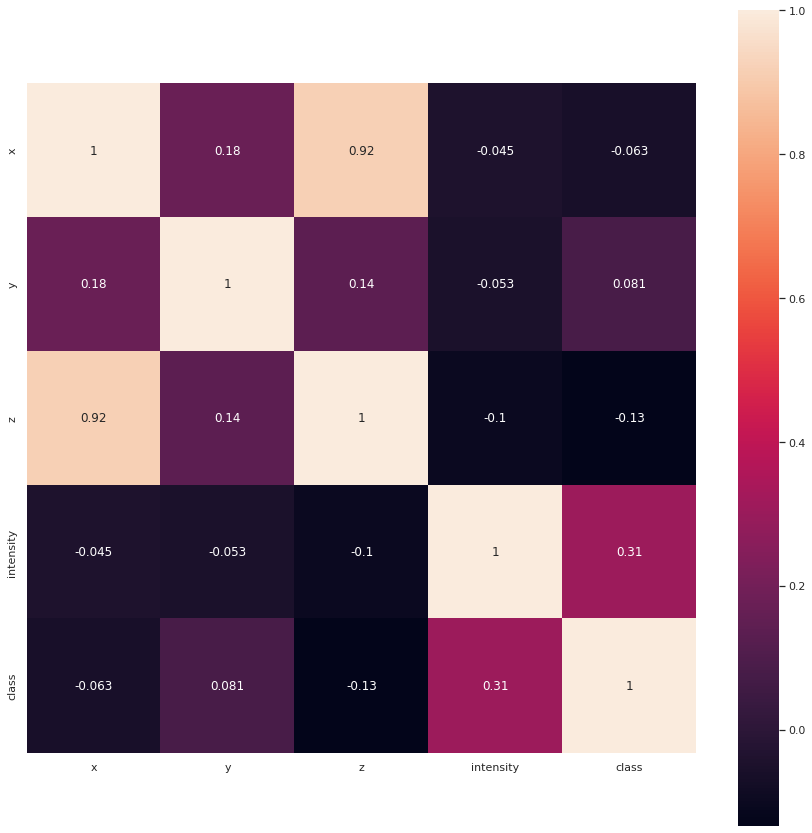

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

In [ ]:
X = df_train.drop(["class"], axis = 1)
y = df_train[["class"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           devices='0:1')

In [ ]:
model.fit(X_train,
          y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
result = recall_score(y_test, pred, average='micro')
print("Recall score",result)

Recall score 0.9410933498189525


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/ya_profi_contest/my_data_test.csv")

In [ ]:
df_test.shape

(827513, 4)

In [ ]:
test_classes = model.predict(df_test)

In [ ]:
test_classes[:10]

array([[50],
       [50],
       [50],
       [50],
       [50],
       [50],
       [50],
       [50],
       [50],
       [50]])

In [ ]:
df_to_save = df_test.copy(deep=True)

In [ ]:
df_to_save["сlass"] = test_classes

In [ ]:
df_to_save.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827513 entries, 0 to 827512
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   x          827513 non-null  float64
 1   y          827513 non-null  float64
 2   z          827513 non-null  float64
 3   intensity  827513 non-null  float64
 4   сlass      827513 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 31.6 MB


In [ ]:
sample_submission = df_to_save.iloc[:, [4]]

In [ ]:
sample_submission

,сlass
0,50
1,50
2,50
3,50
4,50
...,...
827508,50
827509,0
827510,0
827511,0


In [ ]:
sample_submission.to_csv("/content/drive/MyDrive/ya_profi_contest/SampleSubmission.csv", index=False)